In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2 
import os

In [2]:
img = image.load_img("basedata/train/GPM - PNG/GPM_012017.png")

In [3]:
cv2.imread("basedata/train/GPM - PNG/GPM_012017.png").shape

(99, 94, 3)

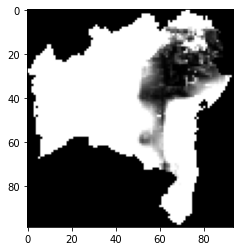

In [4]:
plt.imshow(img)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('basedata/train/',
                                         target_size = (200,200),
                                         batch_size = 5,
                                         class_mode = 'sparse')
validation_dataset = train.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 5,
                                         class_mode = 'sparse')

Found 144 images belonging to 6 classes.
Found 144 images belonging to 6 classes.


In [8]:
train_dataset.class_indices

{'GPM - PNG': 0,
 'HealthData - PNG': 1,
 'SMAP SoilMoisture - PNG': 2,
 'SMAP SurfaceTemperature - PNG': 3,
 'VIIRS - PNG': 4,
 'WorldClimate - PNG': 5}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation = 'softmax')
])

In [18]:
model.compile(loss = "kullback_leibler_divergence",
              optimizer = 'ADAM' ,
              metrics = ['accuracy'])

In [19]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
5/5 [==============================] - 3s 512ms/step - loss: 0.0000e+00 - accuracy: 0.0400 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 2/20
5/5 [==============================] - 2s 379ms/step - loss: -1.2894e-07 - accuracy: 0.1200 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 3/20
5/5 [==============================] - 2s 389ms/step - loss: -1.9342e-07 - accuracy: 0.0800 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 4/20
5/5 [==============================] - 2s 382ms/step - loss: -6.7159e-08 - accuracy: 0.1250 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 5/20
5/5 [==============================] - 2s 379ms/step - loss: -2.5789e-07 - accuracy: 0.0800 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 6/20
5/5 [==============================] - 2s 385ms/step - loss: -6.4472e-08 - accuracy: 0.1200 - val_loss: -1.3432e-07 - val_accuracy: 0.0833
Epoch 7/20
5/5 [==============================] - 2s 389ms/step - loss: -3.2236e-07 - accuracy: 0.080

.DS_Store


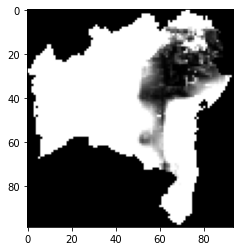

GPM - PNG


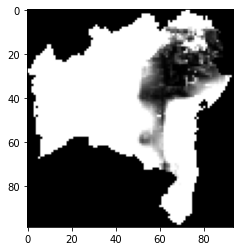

SMAP SoilMoisture - PNG


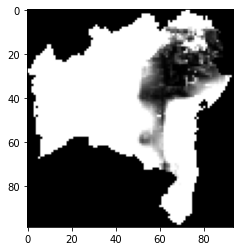

WorldClimate - PNG


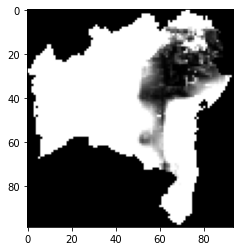

HealthData - PNG


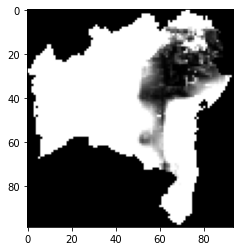

VIIRS - PNG


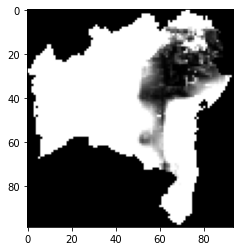

SMAP SurfaceTemperature - PNG


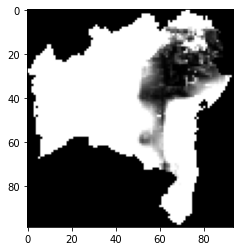

In [20]:
dir_path = 'basedata/test'

for i in os.listdir(dir_path ):
    print(i)
    plt.imshow(img)
    plt.show()
     